# Project 5 Statistical Analysis

### Kaggle Dataset Description:

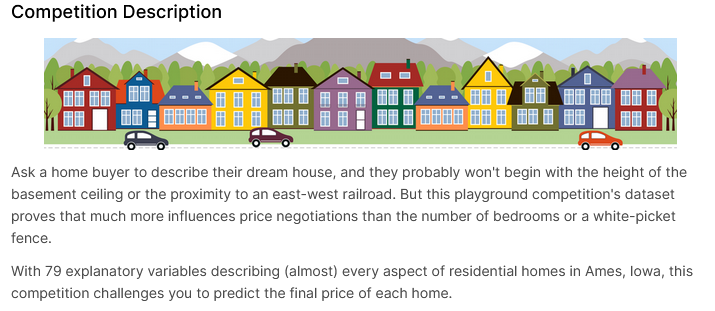

### Ironhack Project Description:

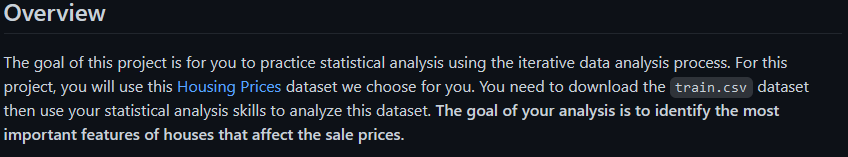

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from scipy.stats import norm
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

### EDA

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.drop(['Id'], axis=1, inplace=True)

In [7]:
print (df.shape[0], 'rows and', df.shape[1], 'columns')

1460 rows and 80 columns


In [8]:
quantitative = [i for i in df.columns if df.dtypes[i] != 'object']
qualitative = [i for i in df.columns if df.dtypes[i] == 'object']

print(len(quantitative) + len(qualitative))

80


In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-10-9a499bf27309>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


<AxesSubplot:>

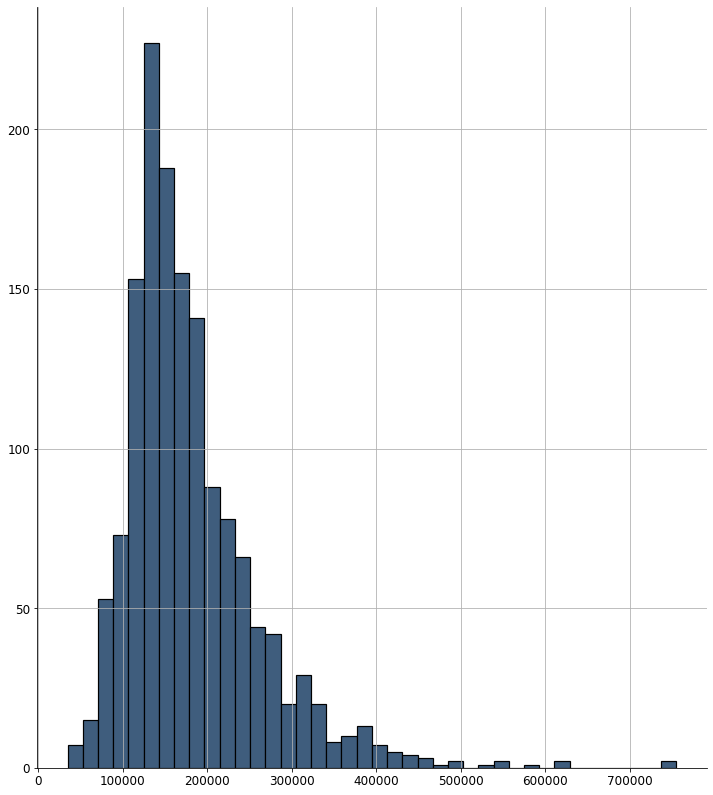

In [10]:
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

df['SalePrice'].hist(bins = 40, color="#3F5D7D", edgecolor='black', linewidth=1.2)

In [11]:
df.isnull().sum()[df.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
df[df['PoolQC'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000


In [13]:
df[df['Fence'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000


In [14]:
df[df['MiscFeature'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000


In [15]:
df[df['Alley'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500


In [16]:
nan_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
              'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for column in nan_columns:
    df[column].fillna('NA', inplace=True)

In [17]:
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

In [18]:
neighborhood_mean = df.groupby('Neighborhood')['LotFrontage'].mean().reset_index()
neighborhood_mean

,Neighborhood,LotFrontage
0,Blmngtn,47.142857
1,Blueste,24.000000
2,BrDale,21.562500
3,BrkSide,57.509804
4,ClearCr,83.461538
5,CollgCr,71.682540
6,Crawfor,71.804878
7,Edwards,68.217391
8,Gilbert,79.877551
9,IDOTRR,62.500000


In [19]:
neigh_list = [i for i in neighborhood_mean['Neighborhood']]
mean_list = [i for i in neighborhood_mean['LotFrontage']]

for i in range(len(neigh_list)):
    df['LotFrontage'][df['Neighborhood'] == neigh_list[i]] = df['LotFrontage'][df['Neighborhood'] == neigh_list[i]].fillna(mean_list[i])

<ipython-input-19-69b9a2b47560>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotFrontage'][df['Neighborhood'] == neigh_list[i]] = df['LotFrontage'][df['Neighborhood'] == neigh_list[i]].fillna(mean_list[i])


In [20]:
df['Electrical'].fillna('SBrkr', inplace=True)

In [21]:
df.isnull().sum()[df.isnull().sum()!=0]
#No more NaNs

Series([], dtype: int64)

In [22]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for feat, i in ordering.items():
        frame.loc[frame[feature] == feat, feature+'_encoded'] = i
    
qual_encoded = []
for f in qualitative:  
    encode(df, f)
    qual_encoded.append(f+'_encoded')
    
print(qual_encoded)

['MSZoning_encoded', 'Street_encoded', 'Alley_encoded', 'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded', 'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded', 'Condition1_encoded', 'Condition2_encoded', 'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded', 'MasVnrType_encoded', 'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded', 'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded', 'BsmtFinType1_encoded', 'BsmtFinType2_encoded', 'Heating_encoded', 'HeatingQC_encoded', 'CentralAir_encoded', 'Electrical_encoded', 'KitchenQual_encoded', 'Functional_encoded', 'FireplaceQu_encoded', 'GarageType_encoded', 'GarageFinish_encoded', 'GarageQual_encoded', 'GarageCond_encoded', 'PavedDrive_encoded', 'PoolQC_encoded', 'Fence_encoded', 'MiscFeature_encoded', 'SaleType_encoded', 'SaleCondition_encoded']


In [23]:
corr_df = df.corr()['SalePrice'].sort_values(ascending=False)
topcorr = corr_df[corr_df > .4].index.to_list()

print(corr_df[corr_df > .4])

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
Neighborhood_encoded    0.696882
ExterQual_encoded       0.682639
KitchenQual_encoded     0.659600
GarageCars              0.640409
GarageArea              0.623431
BsmtQual_encoded        0.622925
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
GarageFinish_encoded    0.549247
TotRmsAbvGrd            0.533723
FireplaceQu_encoded     0.525932
YearBuilt               0.522897
YearRemodAdd            0.507101
Foundation_encoded      0.505503
GarageType_encoded      0.489130
MasVnrArea              0.472614
Fireplaces              0.466929
HeatingQC_encoded       0.427649
MasVnrType_encoded      0.423697
Name: SalePrice, dtype: float64


In [24]:
corr = df[quantitative].corr()
corr2 = df[qual_encoded+['SalePrice']].corr()
corr3 = df[topcorr].corr()

<AxesSubplot:>

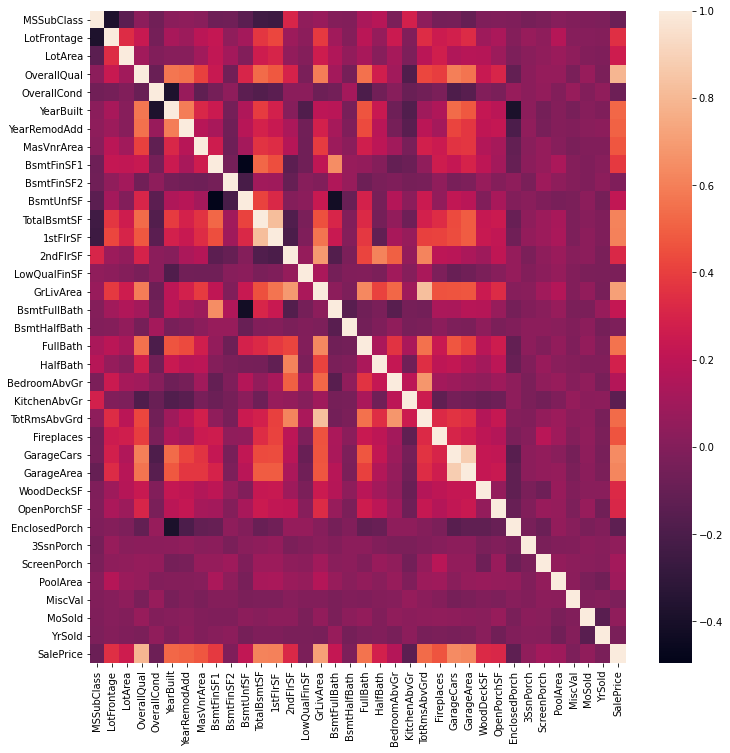

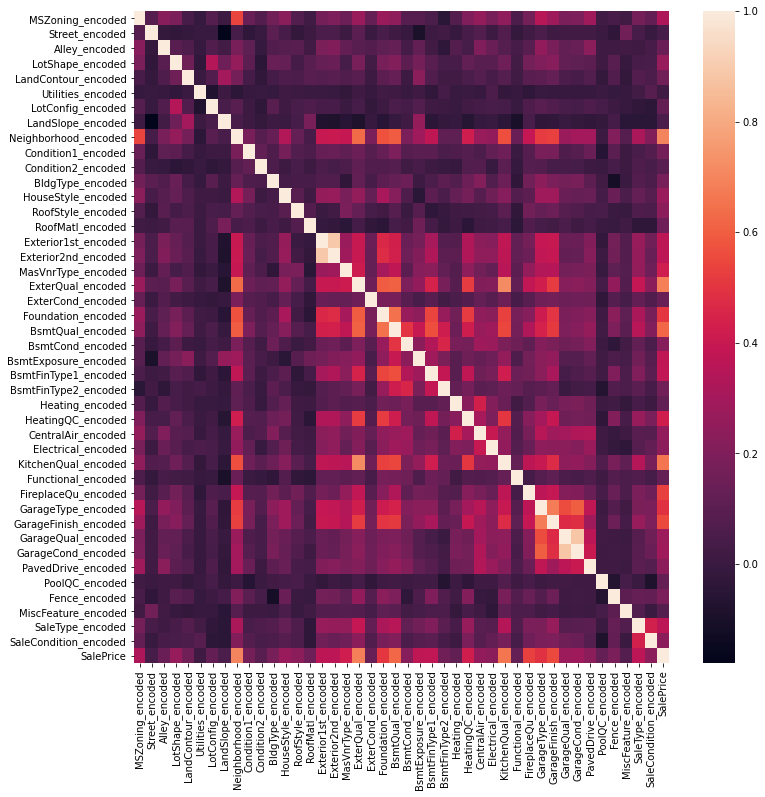

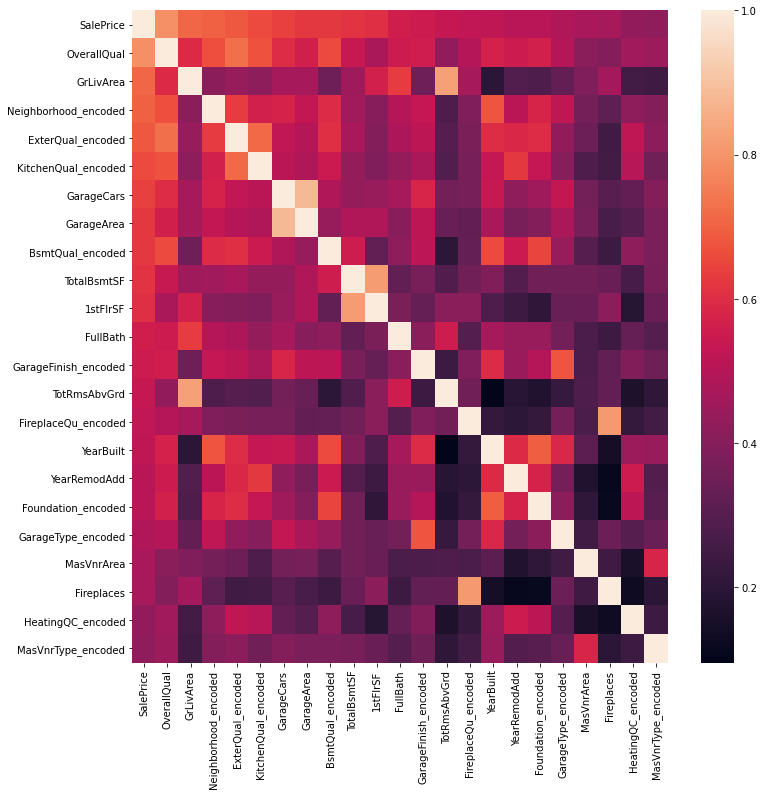

In [25]:
plt.figure(figsize=(12, 12))
plt.figure(1)
sns.heatmap(corr)
plt.figure(figsize=(12, 12))
plt.figure(2)
sns.heatmap(corr2)
plt.figure(figsize=(12, 12))
plt.figure(3)
sns.heatmap(corr3)

In [26]:
data = df[topcorr]

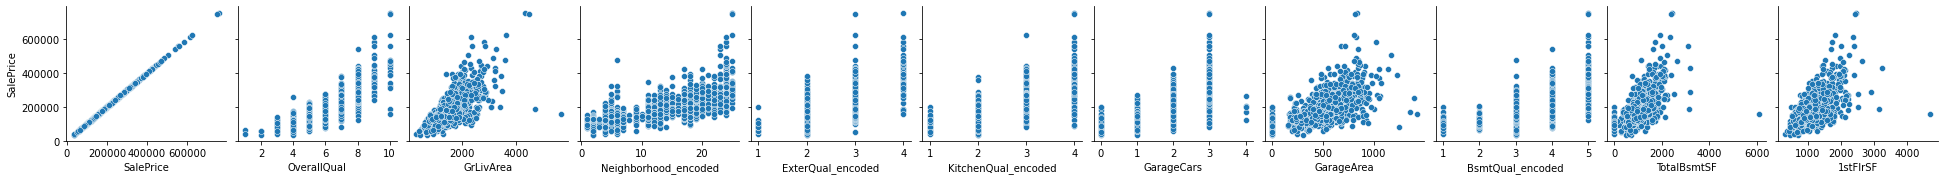

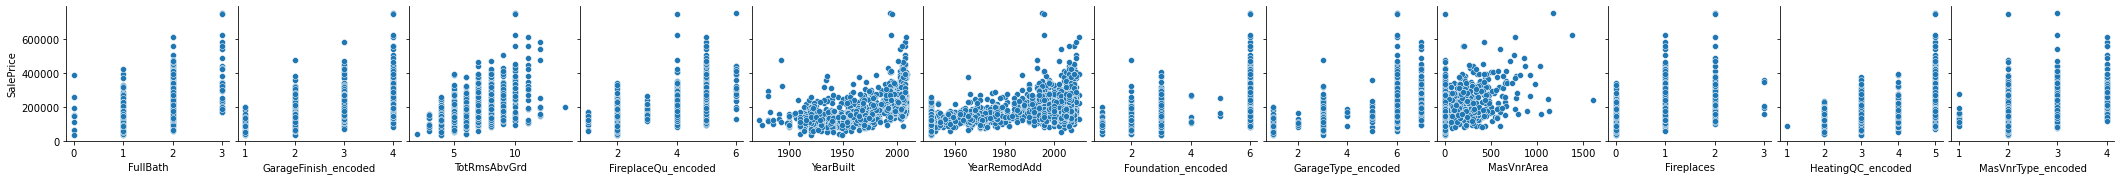

In [27]:
sns.pairplot(data,
             y_vars = ['SalePrice'],
             x_vars = data.columns[:11],
             diag_kind=None)
sns.pairplot(data,
             y_vars = ['SalePrice'],
             x_vars = data.columns[11:],
             diag_kind=None)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

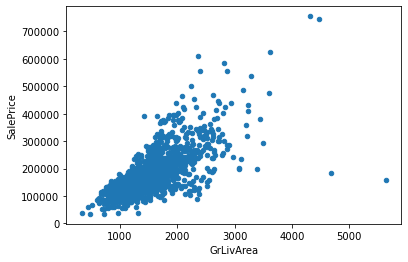

In [28]:
df.plot.scatter(x='GrLivArea', y='SalePrice')

In [29]:
outliers = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index.to_list()
outliers

[523, 1298]

In [30]:
for i in outliers:
    df.drop(i, inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

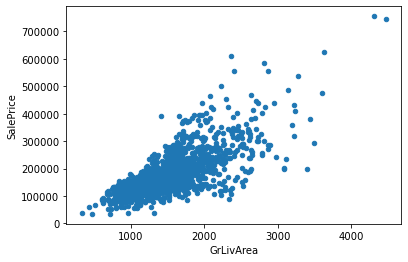

In [31]:
df.plot.scatter(x='GrLivArea', y='SalePrice')

E:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


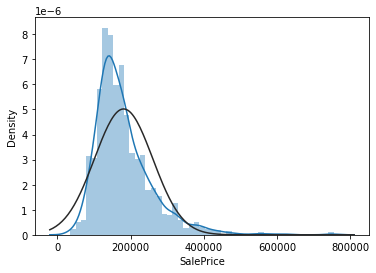

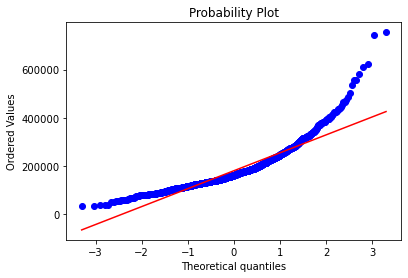

In [32]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

E:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


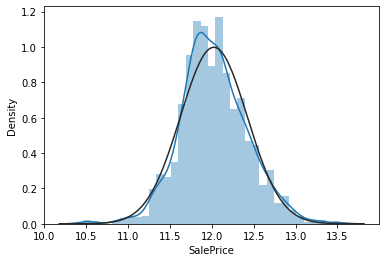

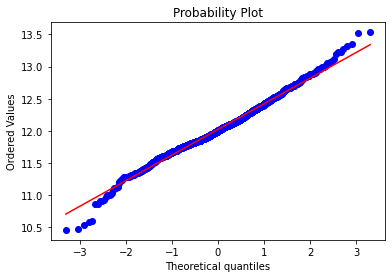

In [33]:
df['SalePrice'] = np.log(df['SalePrice'])

sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [34]:
df = pd.get_dummies(df)

## Linear Regression

In [37]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1020, 441), (438, 441), (1020,), (438,))

In [38]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

m = linreg.coef_[0]
b = linreg.intercept_
      
predicted = linreg.predict(x_test)
    
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':predicted})   
display(df_pred)

,Actual,Predicted
411,11.884489,11.776476
211,12.133502,12.055214
342,11.379394,11.261677
303,11.917724,11.779981
159,12.676076,12.667192
...,...,...
1340,11.719940,11.628496
1099,11.964001,11.997850
416,11.915052,11.976308
747,12.491173,12.288125


In [40]:
metrics.mean_squared_error(y_test, predicted)

0.01830053613971105

In [41]:
metrics.mean_absolute_error(y_test, predicted)

0.09263041892633742

<AxesSubplot:>

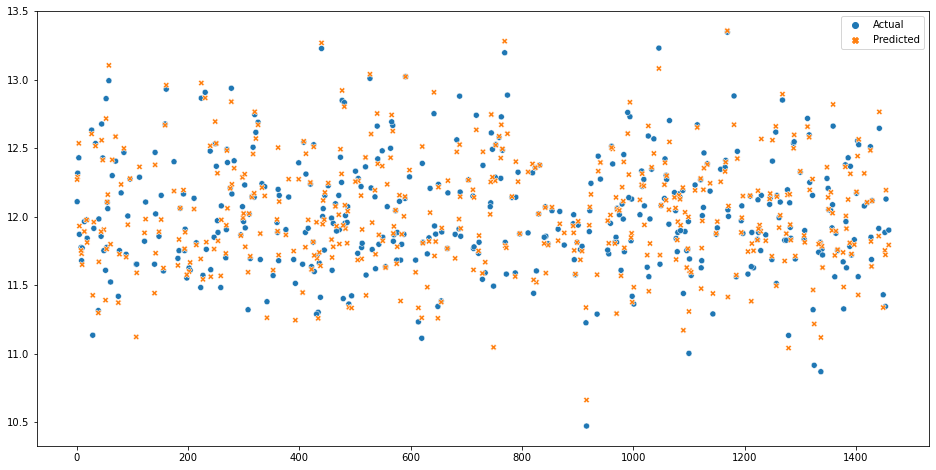

In [48]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df_pred)